# Air Passenger Time Series Mini Project

### 프로젝트 목표
- 비정상 데이터를 정상 데이터로 만들자!    
- 강의에 활용되었던 분류 모델의 성능을 높여보자!

### 루브릭
1. 시계열 데이터를 정상 데이터로 만드는 과정에서 주요한 시각화 과정을 확인하였는가?    
학습 단계별 결과가 제대로 출력되었으며 **로그 변환, 계절성 제거, 특성 중요도 시각화**를 통해 적용이 잘 되었는지 확인하였다.

2. 시계열 데이터를 분석하는 통계적 지표와 분류 모델의 성능을 확인하는 지표를 확인하였는가?    
정상성을 확인하는 지표에서 **ADF**와 **P-value**를 확인하고 **Classification report**를 확인해보았다.

3. 시계열 분류 모델 3가지가 성공적으로 작동하는가?    
**Logistic Regression, RandomForest, XGBoost의 모델 학습 및 테스트**가 정상적으로 수행되고, **결과값**을 얻었다.

## ① 비정상 데이터를 정상 데이터로 만들기

- 데이터가 있는 폴더 연결하기
- tsfresh 설치
- 런타임 재시작
- 필요한 라이브러리 불러오기
- 데이터 불러오기

In [7]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p aiffel/time_series_basic
#!ln -s data/* aiffel/time_series_basic
!cp ../../data/AirPassengers.csv aiffel/time_series_basic/
# aiffel 안에 폴더 하나 더 있어서 그 안에서 실행하는 경우, data 앞에 .. 붙여야함 

#### Kaggle Air Passenger 데이터     

1949년 1월부터 1960년 12월까지 월별 비행기 이용자 수에 대한 그래프이다.

REF) https://www.kaggle.com/datasets/rakannimer/air-passengers

In [6]:
!pwd

/aiffel/aiffel/0Fundamentals


#### ../data~로 실행시켜도 AirPassenger.csv를 불러올 수 없었는데, 준아퍼실님 설명으로 !pwd 확인해서 ../ 한 번에 폴더 하나라는걸 알게되었다.

In [1]:
# !pip install tsfresh

#### 6에서 tsfresh와 numpy가 충돌이 생겨 주석 처리했다.  

In [2]:
# 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작합니다.
import os
# os.kill(os.getpid(), 9)

#### kernerl 연결을 끊는 os.kill을 주석으로 바꿔주었다. 

In [3]:
# 라이브러리 불러오기 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# air passengers 데이터 불러오기
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')

In [5]:
print(ap.shape)
print("===========================================")
print(ap.info())

(144, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [6]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### 열이 Month, #Passenger 2개이고, 행이 144개인 결측치가 없는 데이터이다.

In [7]:
ap.drop('Month', axis = 1, inplace = True)
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


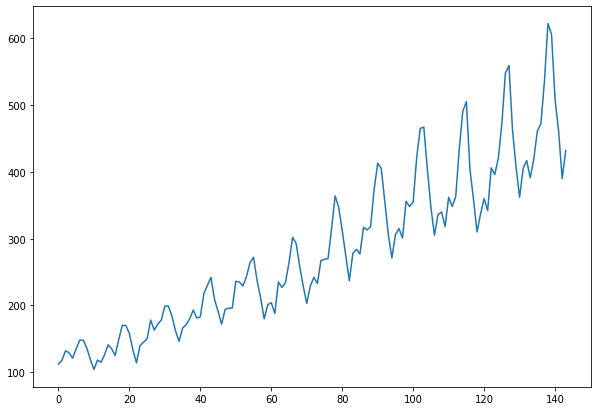

In [8]:
plt.figure(figsize=(10,7))
plt.plot(ap)
plt.show()

#### 그래프가 점점 증가하지만, 계절성을 띔을 확인할 수 있다. 
#### plt.figure(), plt.show() 없이 plt.plot(ap)만 입력해도 그래프는 잘 나온다. 

## ② 분산을 일정하게 만들기 - log transformation

### log transformation을 하는 이유
- 큰 수를 같은비율의 작은 수로 만든다.
- 복잡한 계산을 쉽게 만든다.
- 왜도(skewness)와 첨도(kurtosis)를 줄여서 데이터 분석 시 의미있는 결과를 도출할 수 있다. 

In [9]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)

In [10]:
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


#### 데이터에 정상성을 부여하는 방법으로 분산을 일정하게 만드는 로그 변환을 한다. 

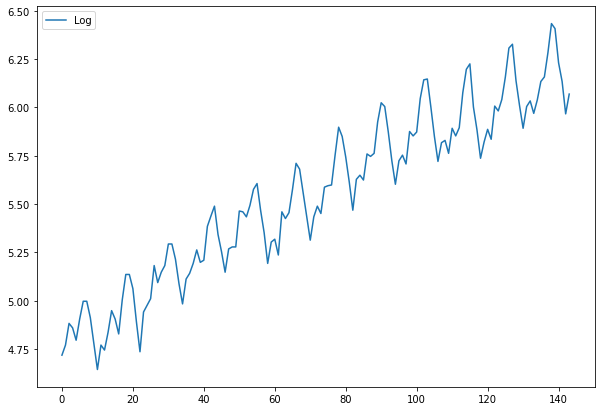

In [11]:
# 분산이 일정해진 것을 눈으로 확인할 수 있음
plt.figure(figsize=(10,7))
plt.plot(log_transformed, label = 'Log')
plt.legend()
plt.show()

#### 로그를 씌우고 어느 부분에서 분산이 일정해졌는지 몰랐는데, 소명님, 상준님 설명으로 그래프의 증폭이 일정해진 것으로 확인할 수 있었다. 

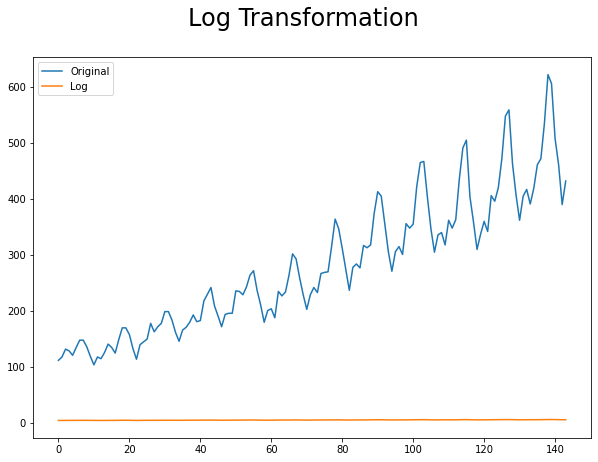

In [12]:
plt.figure(figsize=(10,7))
plt.plot(ap, label = 'Original')
plt.plot(log_transformed, label = 'Log')
plt.suptitle("Log Transformation", size=24)
plt.legend()
plt.show()

#### 로그를 씌운 값만 따로 보면 원래 데이터와 모양이 유사하지만, 원래 값과 같은 그래프에 놓고 비교하면 직선에 가깝다.
#### 보통 로그만으로 안정시계열로 변하지는 않아, 로그함수를 씌운 다음 차분을 한다고 한다. 
REF) 로그, 차분     
https://aliencoder.tistory.com/4  
https://domini21.tistory.com/15 

## ③ 차분을 통해 추세 제거하기

In [13]:
# diff() 함수를 통해 간단하게 차분을 수행할 수 있음
diffed = log_transformed.diff()

In [14]:
diffed

,#Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


#### 데이터에 정상성을 부여하는 방법으로 평균을 일정하게 만드는 차분을 한다. 

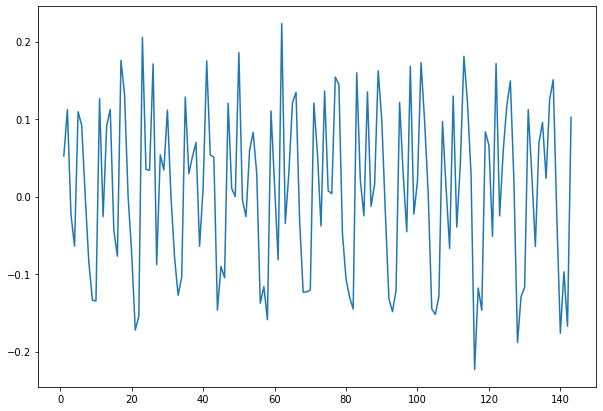

In [15]:
# 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있다
plt.figure(figsize=(10,7))
plt.plot(diffed, label = 'difference')
plt.show()

#### ZeroDivisionError: integer division or modulo by zero 에러가 나왔다.
#### 위에 참고한 블로그에서 로그 변환한 그대로 차분을 한다고 해서 log_transformed를 차분했는데 이런 에러가 나오고, ap로 바꿔주어도 바뀌지 않는다. 
#### 상준님 도움으로 diffed = np.diff(log_transformed)를 diffed = log_transformed.diff()로 바꾸니 해결되었다. 

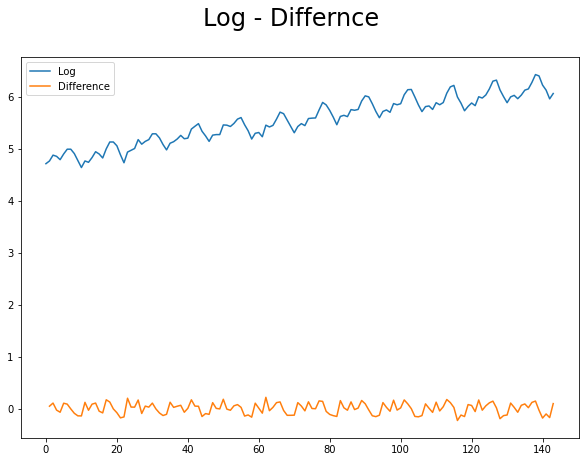

In [16]:
plt.figure(figsize=(10,7))
plt.plot(log_transformed, label = 'Log')
plt.plot(diffed, label = 'Difference')
plt.suptitle("Log - Differnce", size=24)
plt.legend()
plt.show()

#### 1차 차분을 통해 그래프가 조금 더 안정화된 것을 확인할 수 있다. 

## ④ (추가) 계절 차분을 통해 계절성 제거하기
AirPassengers 데이터는 12개월을 주기로 하는 계절성이 포함되어 있습니다. 이런 경우엔 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있습니다.

In [17]:
seasonally_diffed = diffed.diff(12) # diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있음
seasonally_diffed

,#Passengers
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


In [18]:
seasonally_diffed.dropna(inplace = True) # 차분을 하면 데이터가 짧아지기때문에 빈칸을 제거해야함

In [19]:
seasonally_diffed # 아래 데이터는 dropna를 적용하기 전 데이터의 형태. 살펴보기 위해 먼저 확인

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


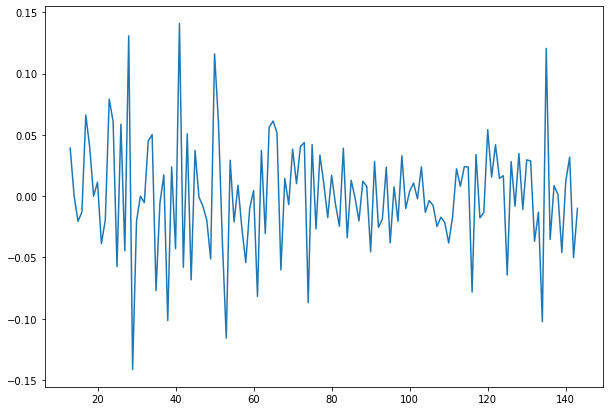

In [20]:
# 아래와 같은 데이터를 얻을 수 있음
plt.figure(figsize=(10,7))
plt.plot(seasonally_diffed)
plt.show()

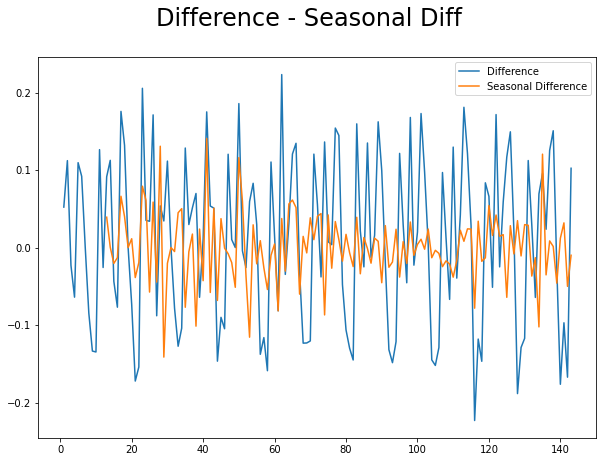

In [21]:
plt.figure(figsize=(10,7))
plt.plot(diffed, label = 'Difference')
plt.plot(seasonally_diffed, label = 'Seasonal Difference')
plt.suptitle("Difference - Seasonal Diff", size=24)
plt.legend()
plt.show()

#### 계절 차분을 통해 그래프가 더욱 안정되었다. 

## ⑤ 검정을 통해 정상성 확인하기

### adfuller : Python에서 statsmodels을 통해 ADF(Augmented Dickey-Fuller) Test를 할 수 있다. 앞서 Classification report를 통해 Logistic Regression 모델을 검증한 것과 마찬가지로 시계열 데이터를 통계 분석하고 검증할 때 사용한다. adfuller를 사용하면 다음과 같은 값을 얻을 수 있다.
- adf(단위근 검정, Augmented Dickey Fuller) : 정상성을 확인하기 위한 단위근 검정방법
- p-value(유의 검정) : 관찰된 데이터가 귀무가설이 맞다면 통계값 1이 실제로 관측된 값 이상일 확률
- usedlag : 사용된 시차의 수
- nobs : ADF 회귀 및 임계값 계산에 사용된 관측치의 수
- critical values(임계값) : 1%, 5% 및 10% 수준에서 테스트 통계에 대한 임계값
- icbest : 0, 1, …, maxlag 값 중 lag 길이를 자동으로 결정할 때 autolag를 사용하며 이때 autolag를 none으로 지정할 수 있는데 none으로 지정하지 않는 경우 최대화된 정보 기준

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다
    print('ADF statistics')
    print(stat) # ADF 검정 통계량입니다
    print('Critical Values')
    print(crit)
    print('P-value')
    print(p_value) # P-value입니다

In [23]:
adf_test(seasonally_diffed) # 계절차분까지 수행한 데이터에 대해 adf테스트를 수행
# 유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고 시계열은 정상적이다라는 대립가설을 채택할 수 있음

ADF statistics
-4.443324941831123
Critical Values
{'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
P-value
0.0002485912311384052


#### 확률변수가 안정적이지 않으면 회귀식을 추정할 때 잘못 추정하는 경우가 생긴다. 따라서 안정적이지 않은 변수를 안정적인 변수로 바꿔준 다음 회귀분석을 해야한다.  단위근 검정은 확률변수가 안정적인지 불안정적인지 확인해주는 검정법이다. 
#### ADF statistics 값이 Critical Values 값들 보다 작고 유의수준 이 0.01 이하이므로 귀무가설이 계속 유지된다. 통계적으로 정상성을 갖는 시계열 데이터임을 확인 할 수 있다. 
#### Critical Values를 출력해서 비교하고 싶었는데, 구글링해도 for문을 쓰는 복잡한 방법밖에 안나왔다. everyone 질문으로 소명님 답변 받아 해결했다. 
REF)   
https://blog.naver.com/jahyone20/220934340547 단위근 검정     
https://blog.naver.com/yolwooju/221909260519 ADF 검정     
https://dodonam.tistory.com/235 ADF 검정 결과 해석하는 방법 

## ⑥ 시계열 분류
강의 때 Logistic Regression을 이용한 시계열 분류가 낮은 score를 보였다. 앙상블 모델과 더 많은 특징을 활용해서 분류 성능을 높여보자!

In [24]:
# ⑥-1 : 데이터 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# 수업때 보았던 robot exection failures데이터를 로드
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

#### 주피터 실행하고 pip install tsfresh 부분은 건너뛰고 실행했더니 ModuleNotFoundError: No module named 'tsfresh' 에러가 났다. 
#### 다시 설치하고 실행하니 이번엔 ImportError: Numba needs NumPy 1.21 or less 에러가 났다. 
#### 아래 블로그대로 !pip install numpy == 1.21 실행했더니 ERROR: Invalid requirement: '==' 에러가 난다. 
#### 성돈 퍼실님 도움으로, 클라우드에서 tsfresh를 다시 깔면서 충돌이 생긴걸 발견해서 위쪽에서 import tsfresh를 주석처리했다. 
REF)    
https://b1a423.tistory.com/66

In [25]:
# ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
timeseries # id, time을 제외하고 6개 column의 X변수가 나타남

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [26]:
y # true/false가 제시되어 있음

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [27]:
# ⑥-3 : 데이터셋 가공
def custom_classification_split(x,y,test_size=0.3): # 수업때 보았던 custom split 함수
    
    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)
    
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    
    y_train = y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()  
    X_train = timeseries[~timeseries['id'].isin(id_list)]
    X_test = timeseries[timeseries['id'].isin(id_list)]
    
    return X_train, y_train, X_test, y_test

REF) Fundamental 43

In [28]:
# ⑥-4 : 데이터셋 나누기
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size = 0.25)

EfficientParameters는 큰 계산비용이 필요한 calculator를 제외하고 가능한 모든 특징 생성

In [29]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

In [30]:
# ⑥-5 : Feature extraction
comprehensive_features_train = extract_features(
                                    X_train, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 402/402 [00:15<00:00, 26.00it/s]


In [31]:
comprehensive_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:04<00:00, 27.45it/s]


impute를 통한 데이터 천처리 

In [33]:
# ⑥-6 : impute
import warnings
warnings.filterwarnings('ignore')  

impute(comprehensive_features_train)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [34]:
impute(comprehensive_features_test)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


## 시계열 분류 모델 3가지 

In [42]:
# ⑥-7 : LogisticRegression 사용 및 score 확인
from sklearn.linear_model import LogisticRegression 

rf_clf = LogisticRegression(max_iter=2000)
rf_clf.fit(comprehensive_features_train, y_train) 

LogisticRegression(max_iter=2000)

In [43]:
rf_clf.score(comprehensive_features_test, y_test)

0.5714285714285714

In [44]:
# ⑥-7 : RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [45]:
rf_clf.score(comprehensive_features_test, y_test) # test셋에 적합해본 결과 약 0.66의 정확도를 보이며 불만족스러운 결과를 확인할 수 있습니다.

0.6190476190476191

In [46]:
# ⑥-7 : XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

xgb_clf.fit(comprehensive_features_train, y_train)

[09:03:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
xgb_clf.score(comprehensive_features_test, y_test)

1.0

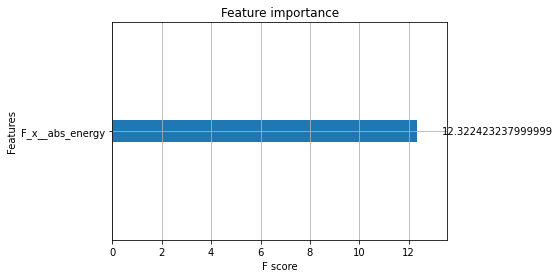

In [48]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
xgb.plot_importance(xgb_clf, importance_type = 'gain') # plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인
plt.show()

In [49]:
sum(xgb_clf.feature_importances_ != 0) # Fx값의 abs_energy특징만의 유의미함

1

In [50]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21}}

classification report를 통해 지표에서 설명하는 통계적인 수치가 각각 무엇인지 설명하고 이해하는 시간을 가져보도록 합시다. classification report에 나타나있는 true와 false에서 precision, recall, f1-score, support가 의미하는 것은 무엇일까요?


In [52]:
print(classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false']))

              precision    recall  f1-score   support

        true       1.00      1.00      1.00        16
       false       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



#### 준아 퍼실님 도움으로 익숙한 모습의 classification report를 출력했다. 

## 회고

**<헤맸던 것>**
- 

**<새롭게 알게된 것>**
- 

**<아직도 모르는 것>**
- 